In [1]:
#fas-정재환
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
import csv
import json
import seaborn as sns
import dask
import dask.dataframe as dd
%matplotlib inline

In [2]:
#한글 폰트 적용 - 한글깨짐 방지
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
pd.set_option('display.max_row', 50000000000) # 한번에 출력할 최대 행 지정
pd.set_option('display.max_columns', 100) # 한번에 출력할 컬럼갯수 지정

In [13]:
# 약 5GB 크기의 csv파일 읽어오기
# 그냥 pandas로 했을때는 20~30분 정도 소요
# 아래와 같이 dask를 이용하면 2분 소요, 10배 정도 읽는 속도가 빠르다
# 그냥 가상 메모리만 읽을 때는 5초도 걸리지 않는다
df_dask = dd.read_csv('NHIS_OPEN_GJ_2017_5.csv', encoding='cp949')
df_dask = df_dask.compute() # 가상메모리를 pandas의 데이터프레임 타입으로 변환

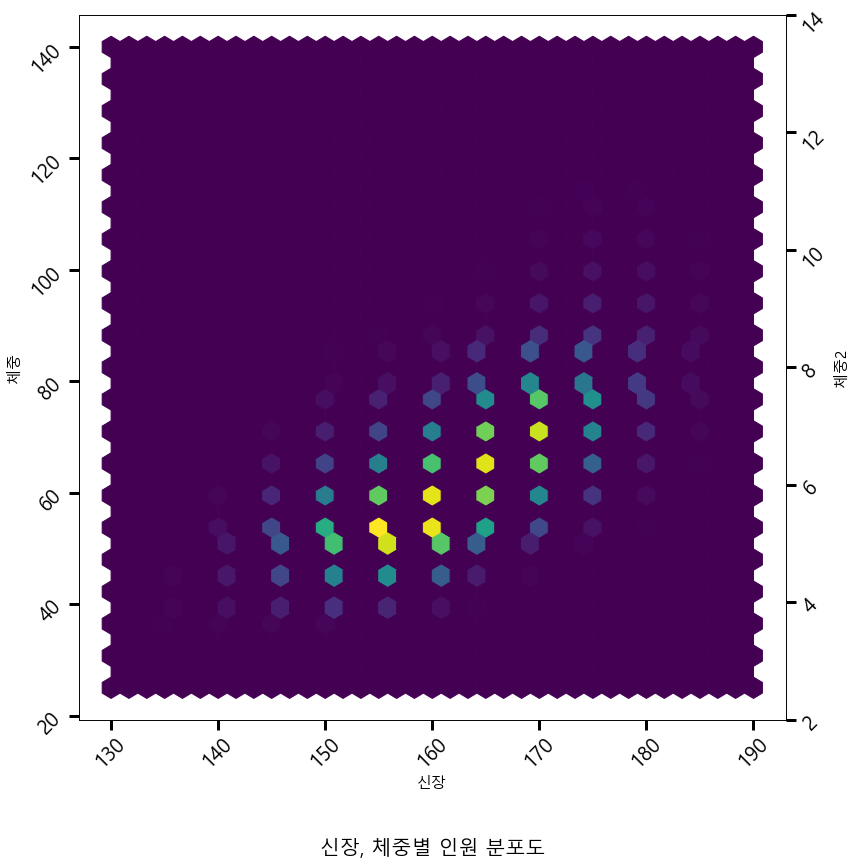

In [14]:
# 데이터 용량이 워낙 커서 그래프로 출력하는데 무려 15초가 소요된다
# add_subplot()을 사용해 서브 plot 생성
# twinx()를 사용해 x, y축의 라벨을 양방향에 모두 표시
# set_ylim()을 사용해 좌표 눈금의 최솟값과 최댓값 설정
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot() # add_subplot()을 사용해 서브 plot 생성
ax.hexbin(x='신장', y='체중', cmap='viridis', gridsize=36, data = df_dask)
ax.set_xlabel('신장', fontsize=15)
ax.set_ylabel('체중', fontsize=15)
ax.set_title('신장, 체중별 인원 분포도', fontsize=20, y=-0.2)
ax.tick_params(axis='x', rotation=45, labelsize=20, length=10, width=3)
ax.tick_params(axis='y', rotation=45, labelsize=20, length=10, width=3)

ax2=ax.twinx() # twinx()를 사용해 x, y축의 라벨을 양방향에 모두 표시
ax2.set_ylim([2, 14])
ax2.set_ylabel('체중2', fontsize=15)
ax2.tick_params(axis='y', rotation=45, labelsize=20, length=10, width=3)

plt.tight_layout()
plt.show()

In [15]:
del df_dask # 메모리 반환